### Notebook to generate Training + Testing Sets for campaign 1 data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fuchs_model import *

In [2]:
seed = 2
tag = 'fuchs_v5_0_seed-' + str(seed)

num_testing_points = 250000 # Number of Points in Testing Dataset
pct_noise = 10 # Percentage of Noise in Dataset
percentPoints = 100 # Percentage of Points to use from Training Set

training_tag = tag + "_train_campaign1_pct_" + str(percentPoints) + "_noise_" + str(pct_noise)
testing_tag = tag + "_test_campaign1_points_" + str(num_testing_points)

In [3]:
df = pd.read_csv('datasets/Table.csv') # table of input parameter combinations
num_training_points = int(df.shape[0] * percentPoints/100 + 0.5)
df = df.sample(frac=percentPoints/100, random_state=seed)

In [4]:
# Free parameters from Fuchs model
c1 = 25
c2 = 0.74
theta = 25
const_f = False

In [5]:
intensity_min = 22 # In W/m^2
intensity_max = 23
focal_distance_min = -30.0e-6 # In m
focal_distance_max = 30.0e-6
target_thickness_min = 0.5e-6 # In m
target_thickness_max = 5.0e-6
# FWHM Period and Spot Size Constant
t_FWHM_min = 40.0e-15
t_FWHM_max = 40.0e-15
spot_size_min = 1.5e-6
spot_size_max = 1.5e-6
t_delay = 0.06e-9 # 60 picosecond delay between pre-pulse and main pulse

In [6]:
df_array = df.to_numpy(dtype=np.float64)
intensities = df_array[:, 2] # Intensity in 3rd column of array
intensities *= 1e4
focal_distances = df_array[:, 1] # Focal Depth in 2nd column of array
focal_distances *= 1e-6
thicknesses = df_array[:, 0] # Target Thickness in 1st column of array
thicknesses *= 1e-6
contrasts = np.ones(num_training_points) * 1e-7 # Contrast constant for all points in campaign 1
time_FWHMs = np.ones(num_training_points) * 40.0e-15 # FWHM Period constant for all points in campaign 1
spot_sizes = np.ones(num_training_points) * 1.5e-6 # Spot Size constant for all points in campaign 1

In [7]:
tmp = fuchs_function_with_prepulse(intensities, focal_distances, thicknesses,contrast=contrasts,t0=t_delay, pct_noise=pct_noise, spectrum=False)
noisy_max_proton_energy = tmp[0]
noisy_total_proton_energy = tmp[1]
noisy_average_proton_energy = tmp[2]
efficiency = tmp[3]
laser_energy = tmp[4]
max_proton_energy = tmp[5]
total_proton_energy = tmp[6]
average_proton_energy = tmp[7]

df = pd.DataFrame({'Intensity': intensities*1e-4, 'Pulse Duration': time_FWHMs*1e15, 'Target Thickness': thicknesses*1e6, 'Spot Size': spot_sizes*1e6, 'Focal Distance': focal_distances*1e6, 'Contrast': contrasts, 'Max Proton Energy': noisy_max_proton_energy,
                    'Total Proton Energy': noisy_total_proton_energy, 'Avg Proton Energy': noisy_average_proton_energy, 'Max Exact Energy': max_proton_energy, 'Total Exact Energy': total_proton_energy, 'Avg Exact Energy': average_proton_energy, 'Laser Energy': laser_energy * 1e3, 'Conversion Efficiency': efficiency})
df

Shape (1155231, 10)


,Intensity,Pulse Duration,Target Thickness,Spot Size,Focal Distance,Contrast,Max Proton Energy,Total Proton Energy,Avg Proton Energy,Max Exact Energy,Total Exact Energy,Avg Exact Energy,Laser Energy,Conversion Efficiency
0,3.602360e+18,40.0,5.00,1.5,12.0,1.000000e-07,0.409167,1.309801e+08,0.074954,0.428663,1.372210e+08,0.078526,4.466118,0.004922
1,1.967000e+18,40.0,0.80,1.5,18.0,1.000000e-07,0.671377,1.673193e+08,0.085594,0.678524,1.691003e+08,0.086505,2.592888,0.010448
2,8.592330e+18,40.0,3.00,1.5,-27.0,1.000000e-07,0.633228,4.730576e+08,0.085400,0.787524,5.883257e+08,0.106210,10.936342,0.008618
3,2.084850e+18,40.0,2.00,1.5,18.0,1.000000e-07,0.530338,1.120188e+08,0.082581,0.452538,9.558564e+07,0.070467,2.742358,0.005584
4,4.932280e+18,40.0,0.65,1.5,9.0,1.000000e-07,1.338297,8.637692e+08,0.148608,1.608450,1.038132e+09,0.178606,5.786720,0.028740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155226,1.951490e+18,40.0,5.00,1.5,0.0,1.000000e-07,0.372299,7.454741e+07,0.076903,0.329852,6.604801e+07,0.068135,2.337487,0.004527
1155227,5.000700e+18,40.0,4.10,1.5,-24.0,1.000000e-07,0.457654,1.774157e+08,0.076975,0.424576,1.645925e+08,0.071411,6.472417,0.004074
1155228,2.193050e+18,40.0,5.00,1.5,-18.0,1.000000e-07,0.203298,2.973244e+07,0.042488,0.189838,2.776385e+07,0.039675,2.879156,0.001545
1155229,4.082300e+18,40.0,0.50,1.5,0.0,1.000000e-07,1.448548,8.471133e+08,0.184176,1.502349,8.785763e+08,0.191017,4.496337,0.031303


(4284, 14)


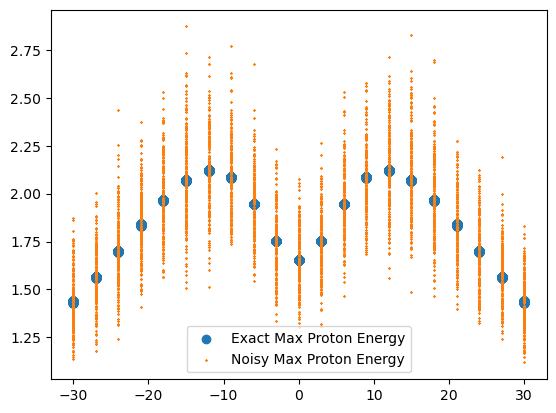

In [8]:
# Visualize dip
thickness = 0.5
intensity = 1e19
dx = 0.05e-2
dI = 1e17
subset_df = df[(df["Target Thickness"]>thickness-dx) & (df["Target Thickness"] < thickness+dx) & (df["Intensity"]<intensity+dI) & (df["Intensity"] > intensity-dI)].drop_duplicates(subset=["Target Thickness", "Focal Distance", "Intensity"]).sort_values(by="Focal Distance")
print(subset_df.shape)
fig, ax = plt.subplots()
ax.scatter(subset_df["Focal Distance"], subset_df["Max Exact Energy"], label="Exact Max Proton Energy")
ax.scatter(subset_df["Focal Distance"], subset_df["Max Proton Energy"], s=1, label="Noisy Max Proton Energy", marker='x')
ax.legend(loc='lower center')

In [9]:
df.to_hdf('datasets/' + training_tag + '.h5', key='df', mode='w')

In [10]:
### Testing set generation
np.random.seed(seed)
intensities = 10**np.random.uniform(intensity_min, intensity_max, num_testing_points)
focal_distances = np.random.uniform(focal_distance_min, focal_distance_max, num_testing_points)
thicknesses = np.random.uniform(target_thickness_min, target_thickness_max, num_testing_points)
contrasts = np.ones(num_testing_points) * 1e-7 # Contrast constant for all points in campaign 1
time_FWHMs = np.ones(num_testing_points) * 40.0e-15 # FWHM Period constant for all points in campaign 1
spot_sizes = np.ones(num_testing_points) * 1.5e-6 # Spot Size constant for all points in campaign 1

In [11]:
tmp = fuchs_function_with_prepulse(intensities, focal_distances, thicknesses,contrast=contrasts,t0=t_delay, pct_noise=0, spectrum=False)
noisy_max_proton_energy = tmp[0]
noisy_total_proton_energy = tmp[1]
noisy_average_proton_energy = tmp[2]
efficiency = tmp[3]
laser_energy = tmp[4]
max_proton_energy = tmp[5]
total_proton_energy = tmp[6]
average_proton_energy = tmp[7]
test_df = pd.DataFrame({'Intensity': intensities*1e-4, 'Pulse Duration': time_FWHMs*1e15, 'Target Thickness': thicknesses*1e6, 'Spot Size': spot_sizes*1e6, 'Focal Distance': focal_distances*1e6, 'Contrast': contrasts, 'Max Proton Energy': noisy_max_proton_energy,
                    'Total Proton Energy': noisy_total_proton_energy, 'Avg Proton Energy': noisy_average_proton_energy, 'Max Exact Energy': max_proton_energy, 'Total Exact Energy': total_proton_energy, 'Avg Exact Energy': average_proton_energy, 'Laser Energy': laser_energy * 1e3, 'Conversion Efficiency': efficiency})
test_df

Shape (250000, 10)


,Intensity,Pulse Duration,Target Thickness,Spot Size,Focal Distance,Contrast,Max Proton Energy,Total Proton Energy,Avg Proton Energy,Max Exact Energy,Total Exact Energy,Avg Exact Energy,Laser Energy,Conversion Efficiency
0,2.728946e+18,40.0,1.051776,1.5,-26.450046,1.000000e-07,0.532066,1.643786e+08,0.072546,0.532066,1.643786e+08,0.072546,3.637183,0.007240
1,1.061515e+18,40.0,4.246384,1.5,-18.366036,1.000000e-07,0.095404,5.704547e+06,0.022011,0.095404,5.704547e+06,0.022011,1.427396,0.000640
2,3.545377e+18,40.0,1.559441,1.5,-2.718593,1.000000e-07,1.116389,5.345812e+08,0.158349,1.116389,5.345812e+08,0.158349,4.025962,0.021272
3,2.724723e+18,40.0,1.308003,1.5,6.771784,1.000000e-07,1.050204,3.803580e+08,0.138395,1.050204,3.803580e+08,0.138395,3.300222,0.018463
4,2.632496e+18,40.0,3.816925,1.5,8.958257,1.000000e-07,0.488578,1.317233e+08,0.085822,0.488578,1.317233e+08,0.085822,3.258011,0.006477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6.501044e+18,40.0,0.771258,1.5,26.107365,1.000000e-07,1.145781,8.661387e+08,0.120501,1.145781,8.661387e+08,0.120501,8.369305,0.016579
249996,3.440949e+18,40.0,1.324869,1.5,-1.549137,1.000000e-07,1.164513,5.541340e+08,0.162680,1.164513,5.541340e+08,0.162680,3.892778,0.022804
249997,1.473278e+18,40.0,0.658985,1.5,-0.892995,1.000000e-07,1.000553,2.264942e+08,0.131458,1.000553,2.264942e+08,0.131458,1.807798,0.020071
249998,1.519065e+18,40.0,1.885229,1.5,1.405396,1.000000e-07,0.666711,1.372672e+08,0.105775,0.666711,1.372672e+08,0.105775,1.861736,0.011812


In [12]:
test_df.to_hdf('datasets/' + testing_tag + '.h5', key='df', mode='w')